## 🌀 Fluid Dynamics Level 1: Basics with Simulations
Notebook of Jalal Ud Din Babar

## 🧪 1. Bernoulli’s Principle – Pressure Drops When Speed Increases

When a fluid moves faster, its pressure drops. [Bernoulli’s equation](https://www.youtube.com/watch?v=DW4rItB20h4) shows that the total energy (pressure + velocity + height) stays constant.

**Experiment:** Blow between two paper strips — they move closer!

**Formula:**
P + (1/2) * ρ * v² + ρ * g * h = constant


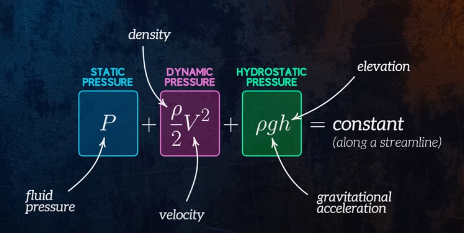

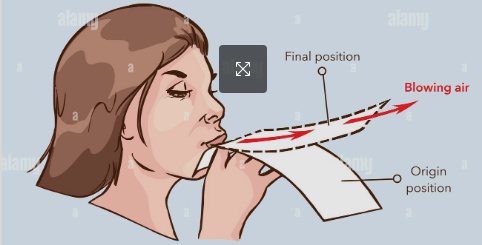

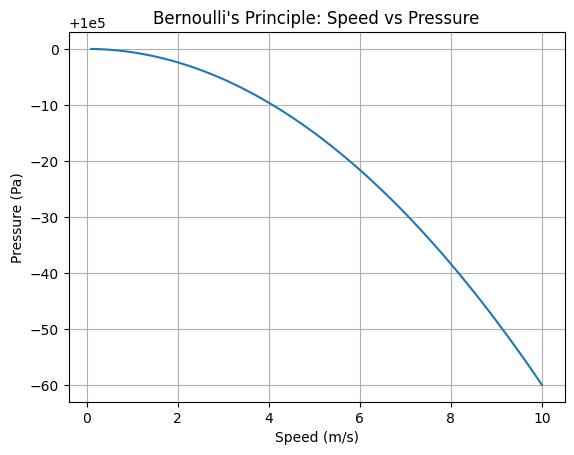

In [1]:
#code simulation
import numpy as np
import matplotlib.pyplot as plt

#100 different velocity values between 0.1 and 10
v = np.linspace(0.1, 10, 100)   # Fluid speeds (m/s)
rho = 1.2  # Air density (kg/m³)
P_total = 100000  # Assume total energy (Pa)

# Calculate pressure drop with speed
P = P_total - 0.5 * rho * v**2

plt.plot(v, P)
plt.title("Bernoulli's Principle: Speed vs Pressure")
plt.xlabel("Speed (m/s)")
plt.ylabel("Pressure (Pa)")
plt.grid(True)
plt.show()

## 🚿 2.Continuity Equation – Flow Speed Changes with Area



A1 * v1 = A2 * v2

**If the pipe gets narrower, the fluid speeds up.** This is why water shoots out faster when you squeeze the hose.

**Try it:** Squeeze a garden hose and watch the jet go faster.


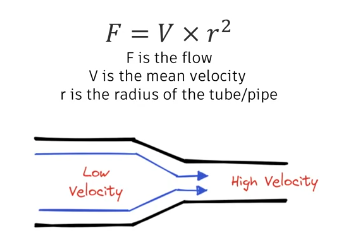

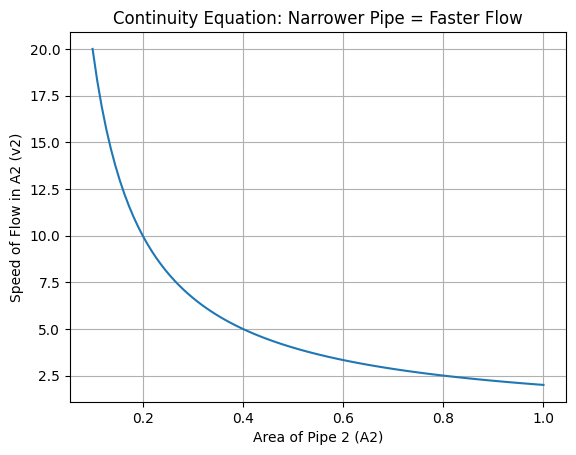

In [2]:
#Continuity equation simulation
import numpy as np
import matplotlib.pyplot as plt

A1 = 1.0  # Wide pipe area
v1 = 2.0  # Initial speed

#if have 100 points or different area between 0.1 and 1.0
A2 = np.linspace(0.1, 1.0, 100)  # Pipe area gets narrower
v2 = A1 * v1 / A2  # Continuity equation

plt.plot(A2, v2)
plt.title("Continuity Equation: Narrower Pipe = Faster Flow")
plt.xlabel("Area of Pipe 2 (A2)")
plt.ylabel("Speed of Flow in A2 (v2)")
plt.grid(True)
plt.show()

## 🌊 3. Reynolds Number: Laminar vs Turbulent

Reynolds Number – Predict Flow Type

Re = (ρ * v * D) / μ

**when**
- **Laminar:** Re < 2000 (smooth)
- **Turbulent:** Re > 4000 (chaotic)

**Try it:** Pour honey vs water. Honey flows smooth; water gets swirly.

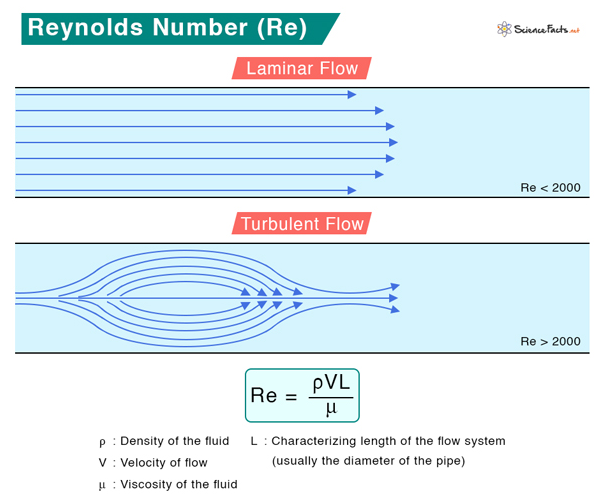

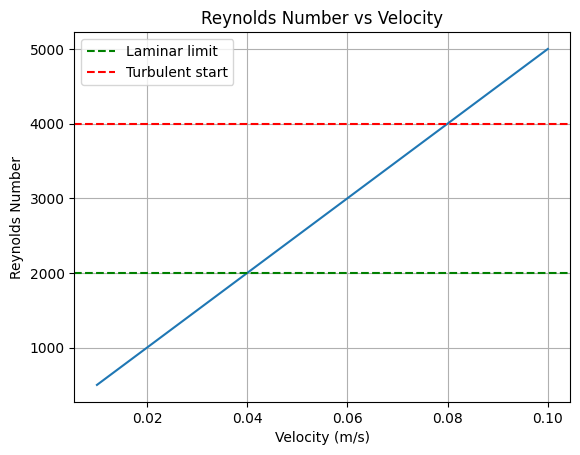

In [5]:
#Reynolds simulation
import numpy as np
import matplotlib.pyplot as plt

v = np.linspace(0.01, 0.1, 100) #velocity (100 diff points between 0.01 and 5)
rho = 1000      # Water density (kg/m³)
D = 0.05        # Pipe diameter (m)
mu = 0.001      # Viscosity (Pa.s)

Re = (rho * v * D) / mu

plt.plot(v, Re)
plt.axhline(2000, color='g', linestyle='--', label='Laminar limit')
plt.axhline(4000, color='r', linestyle='--', label='Turbulent start')
plt.title("Reynolds Number vs Velocity")
plt.xlabel("Velocity (m/s)")
plt.ylabel("Reynolds Number")
plt.legend()
plt.grid(True)
plt.show()

## 🌀 4. Navier-Stokes (Simplified 2D Flow Field)

2D Velocity Field

The Navier-Stokes equations describe how fluids flow using pressure, viscosity, and force.

Here we simulate a 2D "wind field" where velocity increases to the right and swirls upward.


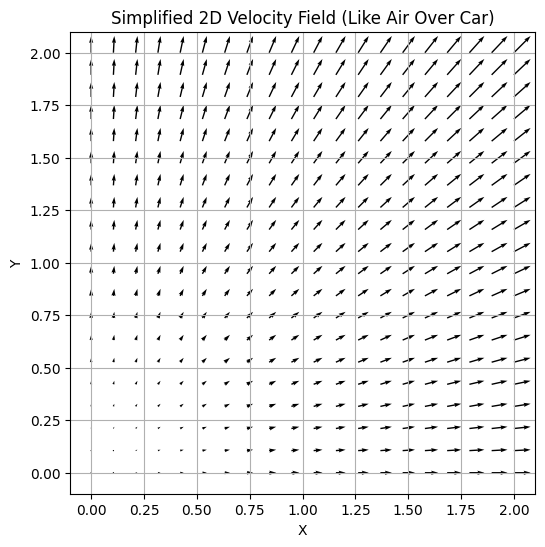

In [8]:
import numpy as np
import matplotlib.pyplot as plt

X, Y = np.meshgrid(np.linspace(0, 2, 20), np.linspace(0, 2, 20))
U = X  # Velocity in X-direction increases
V = Y  # Velocity in Y-direction increases

plt.figure(figsize=(6, 6))
plt.quiver(X, Y, U, V)
plt.title("Simplified 2D Velocity Field (Like Air Over Car)")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()

## 💧 5. Navier-Stokes Example: Poiseuille Flow (Water Between Two Plates)



This is a special solution of the Navier-Stokes equations for steady, laminar, viscous flow.

- Flow is driven by a pressure gradient
- No-slip boundary condition at walls (velocity = 0 at top and bottom)
- Velocity is **maximum at center**, zero at walls → **parabolic profile**

This is common in biomedical devices, microfluidics, or narrow pipes.

We simulate water flowing between two flat plates.
Think of water flowing between two glass plates (like in a microfluidic chip). It moves faster in the center and slower near the walls due to viscosity.

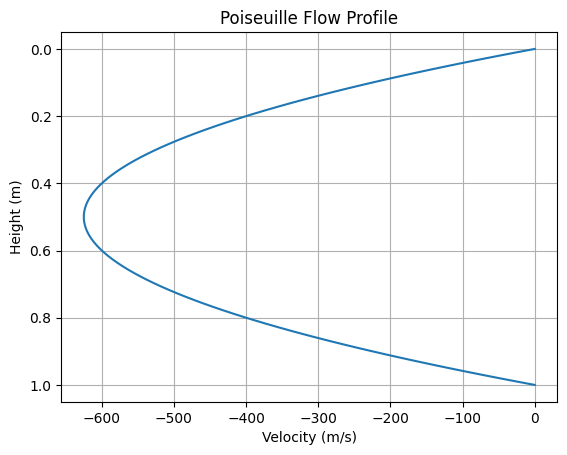

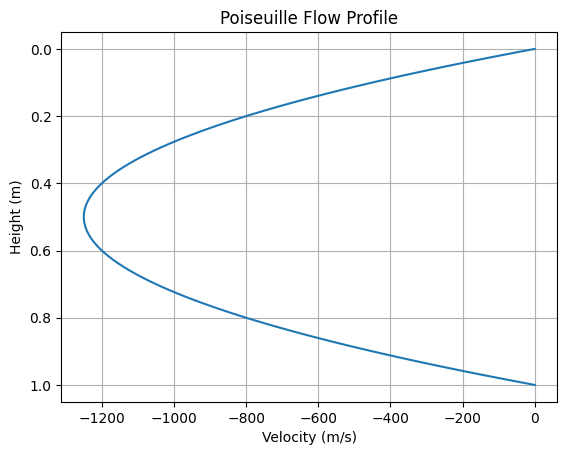

In [7]:
import numpy as np
import matplotlib.pyplot as plt

#define function for poiseuille flow
def poiseuille_flow(dp_dx=-10, H=1.0, mu=0.001):
    y = np.linspace(0, H, 100)
    u = (1 / (2 * mu)) * dp_dx * y * (H - y)
    plt.plot(u, y)
    plt.title("Poiseuille Flow Profile")
    plt.xlabel("Velocity (m/s)")
    plt.ylabel("Height (m)")
    plt.grid(True)
    plt.gca().invert_yaxis()
    plt.show()

# Try different pressure gradients or viscosity
poiseuille_flow(dp_dx=-5)
poiseuille_flow(dp_dx=-20, mu=0.002)

**Observations**

- Velocity is parabolic.
- Zero at walls, max at center.
- This is real viscous flow of liquids — like blood in a capillary or oil in a film.

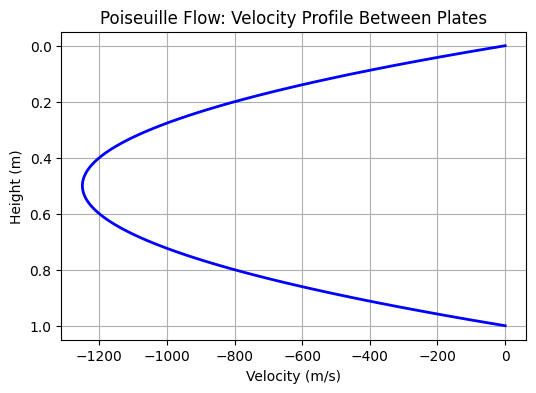

In [9]:
# Required libraries
import numpy as np
import matplotlib.pyplot as plt

# Define fluid and flow parameters
H = 1.0            # Height between plates (meters)
mu = 0.001         # Viscosity of water (Pa.s)
dp_dx = -10        # Pressure gradient (Pa/m)
y = np.linspace(0, H, 100)  # Vertical position (height from bottom plate)

# Analytical solution for steady 2D flow: Poiseuille profile
u = (1 / (2 * mu)) * dp_dx * y * (H - y)

# Plot the velocity profile (line plot)
plt.figure(figsize=(6, 4))
plt.plot(u, y, 'b-', linewidth=2)
plt.title("Poiseuille Flow: Velocity Profile Between Plates")
plt.xlabel("Velocity (m/s)")
plt.ylabel("Height (m)")
plt.grid(True)
plt.gca().invert_yaxis()  # Wall at bottom
plt.show()

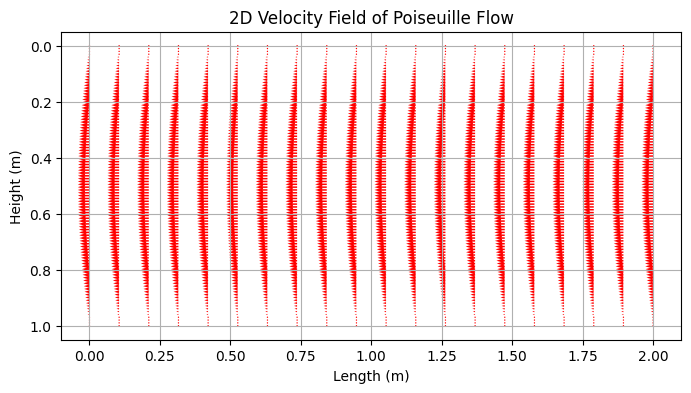

In [10]:
# Create a 2D grid
X, Y = np.meshgrid(np.linspace(0, 2, 20), y)
U = np.tile(u, (20, 1)).T  # Repeat velocity profile in x-direction
V = np.zeros_like(U)      # No vertical velocity

# Plot quiver (vector field)
plt.figure(figsize=(8, 4))
plt.quiver(X, Y, U, V, color='red')
plt.title("2D Velocity Field of Poiseuille Flow")
plt.xlabel("Length (m)")
plt.ylabel("Height (m)")
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

## 🧊6. Physical Problem: Lid-Driven Cavity Flow


**Scenario**
Imagine a square box filled with a fluid (like air or water). This box is closed on all sides, but the top lid (the upper boundary) moves horizontally to the right at a constant speed.

This moving lid "drags" the fluid near it due to viscous forces, which gradually sets the rest of the fluid into motion. Over time, vortices (circular flow patterns) form inside the box, especially in the corners.

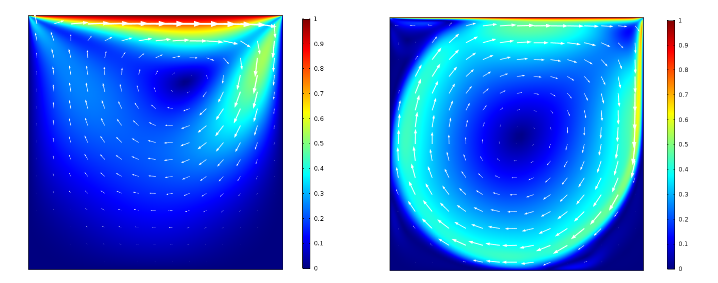

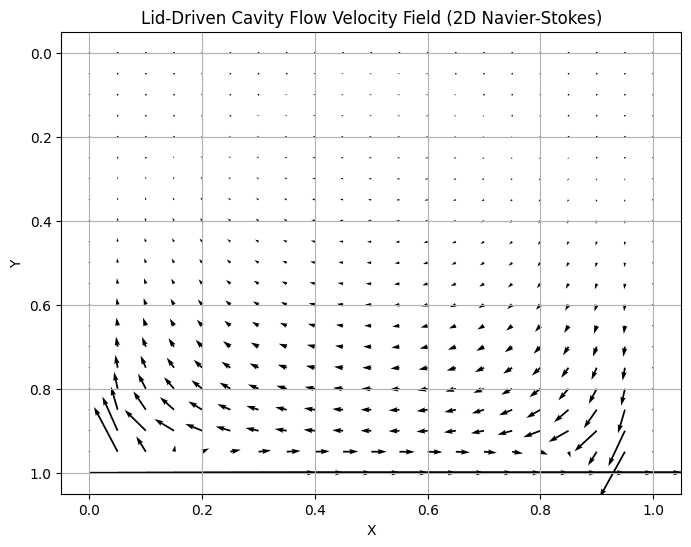

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
nx, ny = 101, 101
lx, ly = 1.0, 1.0
dx = lx / (nx - 1)
dy = ly / (ny - 1)
nt = 5000  # Increased time steps for stability
dt = 0.00001  # Reduced time step for stability
rho = 1.0
nu = 0.01

# Initialize fields
u = np.zeros((ny, nx))
v = np.zeros((ny, nx))
p = np.zeros((ny, nx))
b = np.zeros((ny, nx))

# Build the RHS of pressure Poisson equation
def build_up_b(b, rho, dt, u, v, dx, dy):
    b[1:-1, 1:-1] = rho * (
        1 / dt * (
            (u[1:-1, 2:] - u[1:-1, 0:-2]) / (2 * dx) +
            (v[2:, 1:-1] - v[0:-2, 1:-1]) / (2 * dy)
        ) -
        ((u[1:-1, 2:] - u[1:-1, 0:-2]) / (2 * dx)) ** 2 -
        2 * ((u[2:, 1:-1] - u[0:-2, 1:-1]) / (2 * dy) *
             (v[1:-1, 2:] - v[1:-1, 0:-2]) / (2 * dx)) -
        ((v[2:, 1:-1] - v[0:-2, 1:-1]) / (2 * dy)) ** 2
    )
    return b

# Pressure Poisson Solver (Neumann BC at top)
def pressure_poisson(p, dx, dy, b):
    for _ in range(200):  # Increased iterations
        pn = p.copy()
        p[1:-1, 1:-1] = (
            (dy ** 2 * (pn[1:-1, 2:] + pn[1:-1, 0:-2]) +
             dx ** 2 * (pn[2:, 1:-1] + pn[0:-2, 1:-1]) -
             b[1:-1, 1:-1] * dx ** 2 * dy ** 2)
            / (2 * (dx ** 2 + dy ** 2))
        )
        # Boundary conditions
        p[:, -1] = p[:, -2]  # dp/dx = 0 at x = L
        p[:, 0] = p[:, 1]  # dp/dx = 0 at x = 0
        p[0, :] = p[1, :]  # dp/dy = 0 at y = 0
        p[-1, :] = p[-2, :]  # dp/dy = 0 at y = L
    return p

# Main time loop
for n in range(nt):
    un = u.copy()
    vn = v.copy()

    b = build_up_b(b, rho, dt, u, v, dx, dy)
    p = pressure_poisson(p, dx, dy, b)

    # Corrected Navier-Stokes Equations (Central Differences)
    u[1:-1, 1:-1] = (
        un[1:-1, 1:-1] -
        un[1:-1, 1:-1] * dt / dx * (un[1:-1, 1:-1] - un[1:-1, 0:-2]) / 2 -  # Corrected convective term
        vn[1:-1, 1:-1] * dt / dy * (un[1:-1, 1:-1] - un[0:-2, 1:-1]) / 2 -  # Corrected convective term
        dt / (2 * rho * dx) * (p[1:-1, 2:] - p[1:-1, 0:-2]) +
        nu * (
            dt / dx ** 2 * (un[1:-1, 2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) +
            dt / dy ** 2 * (un[2:, 1:-1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1])
        )
    )

    v[1:-1, 1:-1] = (
        vn[1:-1, 1:-1] -
        un[1:-1, 1:-1] * dt / dx * (vn[1:-1, 1:-1] - vn[1:-1, 0:-2]) / 2 -  # Corrected convective term
        vn[1:-1, 1:-1] * dt / dy * (vn[1:-1, 1:-1] - vn[0:-2, 1:-1]) / 2 -  # Corrected convective term
        dt / (2 * rho * dy) * (p[2:, 1:-1] - p[0:-2, 1:-1]) +
        nu * (
            dt / dx ** 2 * (vn[1:-1, 2:] - 2 * vn[1:-1, 1:-1] + vn[1:-1, 0:-2]) +
            dt / dy ** 2 * (vn[2:, 1:-1] - 2 * vn[1:-1, 1:-1] + vn[0:-2, 1:-1])
        )
    )

    # Boundary conditions
    u[0, :] = 0
    u[:, 0] = 0
    u[:, -1] = 0
    u[-1, :] = 1  # Moving lid (positive x-direction)
    v[0, :] = 0
    v[-1, :] = 0
    v[:, 0] = 0
    v[:, -1] = 0

    # Check for NaN or Inf values
    if np.isnan(u).any() or np.isnan(v).any() or np.isnan(p).any() or \
       np.isinf(u).any() or np.isinf(v).any() or np.isinf(p).any():
        print("NaN or Inf detected! Simulation stopped.")
        break

# Visualization
x = np.linspace(0, lx, nx)
y = np.linspace(0, ly, ny)
X, Y = np.meshgrid(x, y)

plt.figure(figsize=(8, 6))
plt.quiver(X[::5, ::5], Y[::5, ::5], u[::5, ::5], v[::5, ::5])
plt.title("Lid-Driven Cavity Flow Velocity Field (2D Navier-Stokes)")
plt.xlabel("X")
plt.ylabel("Y")
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()